In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [3]:
!kaggle datasets download -d shubham2703/five-crop-diseases-dataset -p /content

Dataset URL: https://www.kaggle.com/datasets/shubham2703/five-crop-diseases-dataset
License(s): CC-BY-NC-SA-4.0
100% 4.32G/4.33G [00:43<00:00, 143MB/s]
100% 4.33G/4.33G [00:43<00:00, 107MB/s]


In [4]:
!unzip /content/five-crop-diseases-dataset.zip -d /content

Streaming output truncated to the last 5000 lines.
  inflating: /content/Crop Diseases Dataset/Crop Diseases/Crop___Disease/Rice/Rice___Leaf_Blast/IMG_20190419_125251.jpg  
  inflating: /content/Crop Diseases Dataset/Crop Diseases/Crop___Disease/Rice/Rice___Leaf_Blast/IMG_20190419_125403.jpg  
  inflating: /content/Crop Diseases Dataset/Crop Diseases/Crop___Disease/Rice/Rice___Leaf_Blast/IMG_20190419_125426.jpg  
  inflating: /content/Crop Diseases Dataset/Crop Diseases/Crop___Disease/Rice/Rice___Leaf_Blast/IMG_20190419_125429.jpg  
  inflating: /content/Crop Diseases Dataset/Crop Diseases/Crop___Disease/Rice/Rice___Leaf_Blast/IMG_20190419_125436.jpg  
  inflating: /content/Crop Diseases Dataset/Crop Diseases/Crop___Disease/Rice/Rice___Leaf_Blast/IMG_20190419_125441.jpg  
  inflating: /content/Crop Diseases Dataset/Crop Diseases/Crop___Disease/Rice/Rice___Leaf_Blast/IMG_20190419_125504.jpg  
  inflating: /content/Crop Diseases Dataset/Crop Diseases/Crop___Disease/Rice/Rice___Leaf_Blast

In [5]:
import tensorflow as tf
from tensorflow.keras import layers, Model
import os

In [6]:
directory_path = r'/content/Crop Diseases Dataset/Crop Diseases/Crop___Disease/Wheat'

In [7]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 10

In [9]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    directory_path,
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 2942 files belonging to 3 classes.


In [10]:
class_names=dataset.class_names
class_names

['Wheat___Brown_Rust', 'Wheat___Healthy', 'Wheat___Yellow_Rust']

In [11]:
dataset_size = tf.data.experimental.cardinality(dataset).numpy()
train_size = int(0.8 * dataset_size)

train_dataset = dataset.take(train_size)
val_dataset = dataset.skip(train_size)

AUTOTUNE = tf.data.AUTOTUNE
train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
val_dataset = val_dataset.prefetch(buffer_size=AUTOTUNE)

In [12]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models

# Efficient Net B0

In [13]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras import layers, Model

input_layer = layers.Input(shape=(256, 256, 3), name="input")

base_model = EfficientNetB0(weights='imagenet', include_top=False, input_tensor=input_layer)

base_model.trainable = False

x = base_model.output
x = layers.BatchNormalization()(x)
x = layers.ReLU()(x)
x = layers.Conv2D(256, (3, 3), padding='same')(x)
x = layers.MaxPooling2D(pool_size=(2, 2))(x)
x = layers.GlobalAveragePooling2D()(x)
output_layer = layers.Dense(4, activation='softmax')(x)

model = Model(inputs=input_layer, outputs=output_layer)

model.summary()

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input (InputLayer)        │ (None, 256, 256, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling (Rescaling)     │ (None, 256, 256, 3)    │              0 │ input[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ normalization             │ (None, 256, 256, 3)    │              7 │ rescaling[0][0]        │
│ (Normalization)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling_1 (Rescaling)   │ (None, 256, 256, 3)    │              0 │ normalization[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv_pad             │ (None, 257, 257, 3)    │              0 │ rescaling_1[0][0]      │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv (Conv2D)        │ (None, 128, 128, 32)   │            864 │ stem_conv_pad[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_bn                   │ (None, 128, 128, 32)   │            128 │ stem_conv[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_activation           │ (None, 128, 128, 32)   │              0 │ stem_bn[0][0]          │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_dwconv            │ (None, 128, 128, 32)   │            288 │ stem_activation[0][0]  │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_bn                │ (None, 128, 128, 32)   │            128 │ block1a_dwconv[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_activation        │ (None, 128, 128, 32)   │              0 │ block1a_bn[0][0]       │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_squeeze        │ (None, 32)             │              0 │ block1a_activation[0]… │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_reshape        │ (None, 1, 1, 32)       │              0 │ block1a_se_squeeze[0]… │
│ (Reshape)                 │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_reduce         │ (None, 1, 1, 8)        │            264 │ block1a_se_reshape[0]… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_expand    

 Total params: 7,005,095 (26.72 MB)

 Trainable params: 2,952,964 (11.26 MB)

 Non-trainable params: 4,052,131 (15.46 MB)

In [14]:
model.compile(
    optimizer= tf.keras.optimizers.Adam(learning_rate = 0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [15]:
history = model.fit(
        train_dataset,
        validation_data=val_dataset,
        epochs=3,
        verbose=1
    )

Epoch 1/3
73/73 ━━━━━━━━━━━━━━━━━━━━ 53s 377ms/step - accuracy: 0.7997 - loss: 2.8494 - val_accuracy: 0.9719 - val_loss: 0.1312
Epoch 2/3
73/73 ━━━━━━━━━━━━━━━━━━━━ 18s 244ms/step - accuracy: 0.9784 - loss: 0.1036 - val_accuracy: 0.9851 - val_loss: 0.0736
Epoch 3/3
73/73 ━━━━━━━━━━━━━━━━━━━━ 13s 184ms/step - accuracy: 0.9802 - loss: 0.1451 - val_accuracy: 0.9884 - val_loss: 0.0698


In [16]:
labels=["Brown Rust", "Healthy","Yellow Rust"]

In [17]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

test_loss, test_accuracy = model.evaluate(val_dataset)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

y_true = []
y_pred = []

for images, labels in val_dataset:
    predictions = model.predict(images)
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(predictions, axis=1))

19/19 ━━━━━━━━━━━━━━━━━━━━ 7s 77ms/step - accuracy: 0.9903 - loss: 0.0754
Test Loss: 0.06245505437254906
Test Accuracy: 0.9917491674423218
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


In [18]:
class_names = ["Brown Rust", "Healthy", "Yellow Rust"]

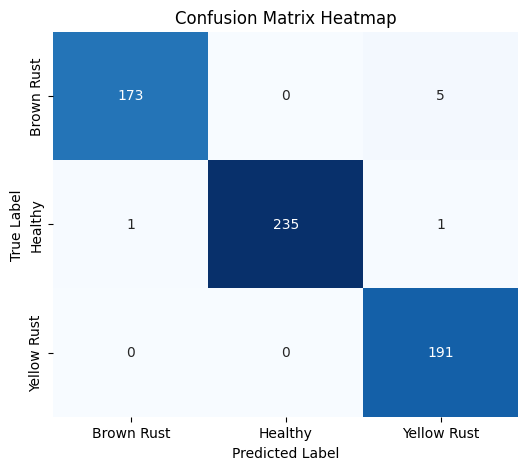

In [19]:
cm = confusion_matrix(y_true, y_pred)

# Plot heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names,cbar=False)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heatmap")
plt.show()

In [20]:
class_report = classification_report(y_true, y_pred)
print("Classification Report:")
print(class_report)

accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy: {accuracy}")

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       178
           1       1.00      0.99      1.00       237
           2       0.97      1.00      0.98       191

    accuracy                           0.99       606
   macro avg       0.99      0.99      0.99       606
weighted avg       0.99      0.99      0.99       606

Accuracy: 0.9884488448844885


# VGG16

In [21]:
from tensorflow.keras.applications import VGG16

input_layer = layers.Input(shape=(256, 256, 3), name="input")
base_model = VGG16(weights='imagenet', include_top=False, input_tensor=input_layer)
base_model.trainable = False  # Freeze layers

x = base_model.output
x = layers.GlobalAveragePooling2D()(x)
output_layer = layers.Dense(4, activation='softmax')(x)

model = Model(inputs=input_layer, outputs=output_layer)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [22]:
model.compile(
    optimizer= tf.keras.optimizers.Adam(learning_rate = 0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [23]:
for images, labels in train_dataset.take(1):
    print("Image shape:", images.shape)
    print("Label shape:", labels.shape)

# Train the model
try:
    history = model.fit(
        train_dataset,
        validation_data=val_dataset,
        epochs=20,
        verbose=1
    )
except Exception as e:
    print("Error during training:", e)

Image shape: (32, 256, 256, 3)
Label shape: (32,)
Epoch 1/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 54s 534ms/step - accuracy: 0.4613 - loss: 2.9025 - val_accuracy: 0.8399 - val_loss: 0.5284
Epoch 2/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 26s 354ms/step - accuracy: 0.8857 - loss: 0.3456 - val_accuracy: 0.9290 - val_loss: 0.2895
Epoch 3/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 25s 351ms/step - accuracy: 0.9310 - loss: 0.2093 - val_accuracy: 0.9356 - val_loss: 0.2460
Epoch 4/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 40s 338ms/step - accuracy: 0.9421 - loss: 0.1504 - val_accuracy: 0.9439 - val_loss: 0.1888
Epoch 5/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 26s 357ms/step - accuracy: 0.9620 - loss: 0.1005 - val_accuracy: 0.9439 - val_loss: 0.1566
Epoch 6/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 41s 351ms/step - accuracy: 0.9687 - loss: 0.0901 - val_accuracy: 0.9571 - val_loss: 0.1265
Epoch 7/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 26s 355ms/step - accuracy: 0.9763 - loss: 0.0692 - val_accuracy: 0.9604 - val_loss: 0.1229
Epoch 8/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 40s 339ms

In [24]:
model.evaluate(val_dataset)

19/19 ━━━━━━━━━━━━━━━━━━━━ 10s 207ms/step - accuracy: 0.9841 - loss: 0.0437


[0.06566662341356277, 0.9752475023269653]

19/19 ━━━━━━━━━━━━━━━━━━━━ 10s 214ms/step - accuracy: 0.9787 - loss: 0.0466
Test Loss: 0.06620718538761139
Test Accuracy: 0.9752475023269653
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 692ms/step


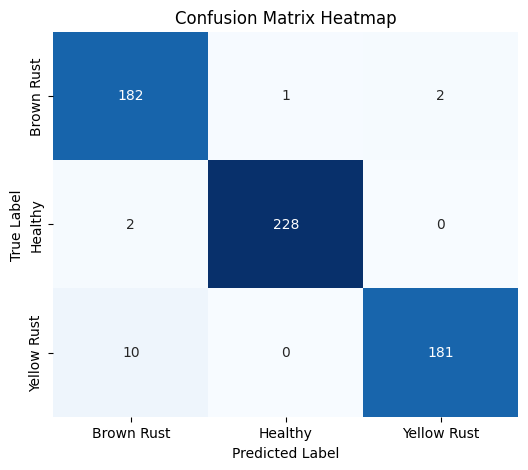

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       185
           1       1.00      0.99      0.99       230
           2       0.99      0.95      0.97       191

    accuracy                           0.98       606
   macro avg       0.97      0.97      0.97       606
weighted avg       0.98      0.98      0.98       606

Accuracy: 0.9752475247524752


In [25]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(val_dataset)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# Predict on the test set
y_true = []
y_pred = []

for images, labels in val_dataset:
    predictions = model.predict(images)
    y_true.extend(labels.numpy())  # Assuming labels are in a tensor format
    y_pred.extend(np.argmax(predictions, axis=1))  # Convert softmax outputs to class labels

# Calculate the confusion matrix
cm_2 = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_2, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names,cbar=False)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heatmap")
plt.show()

# Calculate the classification report (precision, recall, F1-score)
class_report = classification_report(y_true, y_pred)
print("Classification Report:")
print(class_report)

# Calculate accuracy using sklearn
accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy: {accuracy}")


# Resnet

In [26]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D

# Load Pretrained ResNet50 (Exclude top layers, use ImageNet weights)
base_model = ResNet50(weights="imagenet", include_top=False, input_shape=(256, 256, 3))

# Freeze base model layers (optional, for transfer learning)
base_model.trainable = False  # Set to True if you want to fine-tune

# Add custom classification head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
# x = Dropout(0.3)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.3)(x)
output_layer = Dense(10, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output_layer)

# Summary of the model
model.summary()

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 256, 256, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 262, 262, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 128, 128, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 128, 128, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 128, 128, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 130, 130, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 64, 64, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 64, 64, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 64, 64, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 64, 64, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 64, 64, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 64, 64, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 64, 64, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 64, 64, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 64, 64, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 24,770,698 (94.49 MB)

 Trainable params: 1,182,986 (4.51 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [27]:
model.compile(
    optimizer = tf.keras.optimizers.AdamW(learning_rate=0.001, weight_decay=1e-4),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)
for images, labels in train_dataset.take(1):
    print("Image shape:", images.shape)
    print("Label shape:", labels.shape)   # Expected: (BATCH_SIZE,) for sparse_categorical_crossentropy

# Train the model
try:
    history = model.fit(
        train_dataset,
        validation_data=val_dataset,
        epochs=3,
        verbose=1
    )
except Exception as e:
    print("Error during training:", e)

Image shape: (32, 256, 256, 3)
Label shape: (32,)
Epoch 1/3
73/73 ━━━━━━━━━━━━━━━━━━━━ 38s 330ms/step - accuracy: 0.8361 - loss: 0.4892 - val_accuracy: 0.9752 - val_loss: 0.0695
Epoch 2/3
73/73 ━━━━━━━━━━━━━━━━━━━━ 14s 198ms/step - accuracy: 0.9870 - loss: 0.0369 - val_accuracy: 0.9950 - val_loss: 0.0177
Epoch 3/3
73/73 ━━━━━━━━━━━━━━━━━━━━ 21s 198ms/step - accuracy: 0.9925 - loss: 0.0224 - val_accuracy: 0.9769 - val_loss: 0.0584


19/19 ━━━━━━━━━━━━━━━━━━━━ 8s 95ms/step - accuracy: 0.9774 - loss: 0.0617
Test Loss: 0.050308454781770706
Test Accuracy: 0.9818481802940369
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


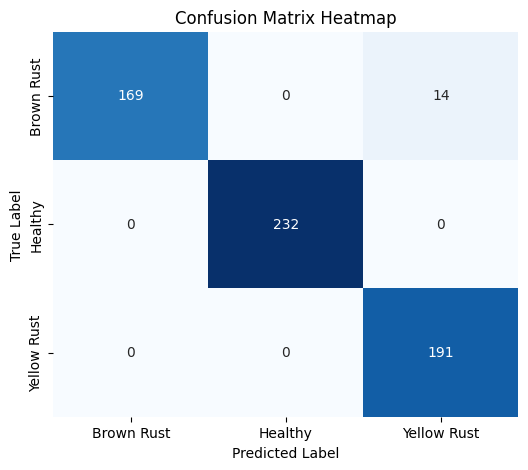

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.92      0.96       183
           1       1.00      1.00      1.00       232
           2       0.93      1.00      0.96       191

    accuracy                           0.98       606
   macro avg       0.98      0.97      0.97       606
weighted avg       0.98      0.98      0.98       606

Accuracy: 0.976897689768977


In [28]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


test_loss, test_accuracy = model.evaluate(val_dataset)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

y_true = []
y_pred = []

for images, labels in val_dataset:
    predictions = model.predict(images)
    y_true.extend(labels.numpy())  # Assuming labels are in a tensor format
    y_pred.extend(np.argmax(predictions, axis=1))  # Convert softmax outputs to class labels

# Calculate the confusion matrix
cm_3 = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_3, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names,cbar=False)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heatmap")
plt.show()

# Calculate the classification report (precision, recall, F1-score)
class_report = classification_report(y_true, y_pred)
print("Classification Report:")
print(class_report)

# Calculate accuracy using sklearn
accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy: {accuracy}")


# Dense Net

In [29]:
import tensorflow as tf
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras import layers, Model
from tensorflow.keras.regularizers import l2

# Data Augmentation Layer
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
])

input_layer = layers.Input(shape=(256, 256, 3), name="input")

# Data Augmentation
augmented = data_augmentation(input_layer)

base_model = DenseNet121(weights='imagenet', include_top=False, input_tensor=augmented)
base_model.trainable = False  # Unfreeze later for fine-tuning

#Custom Layers
x = layers.BatchNormalization()(base_model.output)
x = layers.ReLU()(x)
x = layers.Conv2D(256, (3, 3), padding='same', kernel_regularizer=l2(0.001))(x)  # L2 Regularization
x = layers.MaxPooling2D(pool_size=(2, 2))(x)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.4)(x)  # 40% Dropout for Regularization
output_layer = layers.Dense(4, activation='softmax')(x)  # 4 Classes

model = Model(inputs=input_layer, outputs=output_layer)

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

model.summary()


29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input (InputLayer)        │ (None, 256, 256, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ sequential (Sequential)   │ (None, 256, 256, 3)    │              0 │ input[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ zero_padding2d            │ (None, 262, 262, 3)    │              0 │ sequential[0][0]       │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 128, 128, 64)   │          9,408 │ zero_padding2d[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 128, 128, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 128, 128, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ zero_padding2d_1          │ (None, 130, 130, 64)   │              0 │ conv1_relu[0][0]       │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1 (MaxPooling2D)      │ (None, 64, 64, 64)     │              0 │ zero_padding2d_1[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_bn         │ (None, 64, 64, 64)     │            256 │ pool1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_relu       │ (None, 64, 64, 64)     │              0 │ conv2_block1_0_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 64, 64, 128)    │          8,192 │ conv2_block1_0_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 64, 64, 128)    │            512 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 64, 64, 128)    │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 64, 64, 32)     │         36,864 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_concat       │ (None, 64, 64, 96)     │              0 │ pool1[0][0],           │
│ (Concatenate)        

 Total params: 9,402,180 (35.87 MB)

 Trainable params: 2,362,628 (9.01 MB)

 Non-trainable params: 7,039,552 (26.85 MB)

In [30]:
model.compile(
    optimizer= tf.keras.optimizers.Adam(learning_rate = 0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)
for images, labels in train_dataset.take(1):
    print("Image shape:", images.shape)
    print("Label shape:", labels.shape)   # Expected: (BATCH_SIZE,) for sparse_categorical_crossentropy

# Train the model
try:
    history = model.fit(
        train_dataset,
        validation_data=val_dataset,
        epochs=15,
        verbose=1
    )
except Exception as e:
    print("Error during training:", e)

Image shape: (32, 256, 256, 3)
Label shape: (32,)
Epoch 1/15
73/73 ━━━━━━━━━━━━━━━━━━━━ 48s 388ms/step - accuracy: 0.8706 - loss: 1.0935 - val_accuracy: 0.9191 - val_loss: 1.3977
Epoch 2/15
73/73 ━━━━━━━━━━━━━━━━━━━━ 22s 299ms/step - accuracy: 0.9407 - loss: 1.0170 - val_accuracy: 0.9010 - val_loss: 1.1603
Epoch 3/15
73/73 ━━━━━━━━━━━━━━━━━━━━ 23s 315ms/step - accuracy: 0.9657 - loss: 0.6079 - val_accuracy: 0.9686 - val_loss: 0.5232
Epoch 4/15
73/73 ━━━━━━━━━━━━━━━━━━━━ 21s 286ms/step - accuracy: 0.9727 - loss: 0.5345 - val_accuracy: 0.9307 - val_loss: 0.8282
Epoch 5/15
73/73 ━━━━━━━━━━━━━━━━━━━━ 21s 285ms/step - accuracy: 0.9713 - loss: 0.5384 - val_accuracy: 0.9323 - val_loss: 0.6951
Epoch 6/15
73/73 ━━━━━━━━━━━━━━━━━━━━ 22s 296ms/step - accuracy: 0.9794 - loss: 0.3646 - val_accuracy: 0.9521 - val_loss: 0.5615
Epoch 7/15
73/73 ━━━━━━━━━━━━━━━━━━━━ 21s 288ms/step - accuracy: 0.9716 - loss: 0.4913 - val_accuracy: 0.9637 - val_loss: 0.4827
Epoch 8/15
73/73 ━━━━━━━━━━━━━━━━━━━━ 21s 285ms

19/19 ━━━━━━━━━━━━━━━━━━━━ 8s 159ms/step - accuracy: 0.9744 - loss: 0.2791
Test Loss: 0.2408704161643982
Test Accuracy: 0.9801980257034302
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


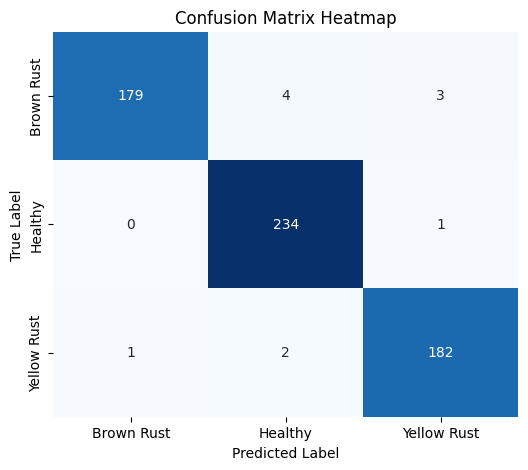

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.96      0.98       186
           1       0.97      1.00      0.99       235
           2       0.98      0.98      0.98       185

    accuracy                           0.98       606
   macro avg       0.98      0.98      0.98       606
weighted avg       0.98      0.98      0.98       606

Accuracy: 0.9818481848184818


In [31]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


test_loss, test_accuracy = model.evaluate(val_dataset)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

y_true = []
y_pred = []

for images, labels in val_dataset:
    predictions = model.predict(images)
    y_true.extend(labels.numpy())  # Assuming labels are in a tensor format
    y_pred.extend(np.argmax(predictions, axis=1))  # Convert softmax outputs to class labels

# Calculate the confusion matrix
cm_3 = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_3, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names,cbar=False)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heatmap")
plt.show()

# Calculate the classification report (precision, recall, F1-score)
class_report = classification_report(y_true, y_pred)
print("Classification Report:")
print(class_report)

# Calculate accuracy using sklearn
accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy: {accuracy}")
